# i2b2 export analysis (v1)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# load data

In [3]:
# load data
case = pd.read_csv("exports/v1/i2b2-export_patient-central-line-infections-sample_20230911-013643.csv")
control = pd.read_csv("exports/v1/i2b2-export_patient-central-line-sample_20230911-015152.csv")



# visualize data

## RACE

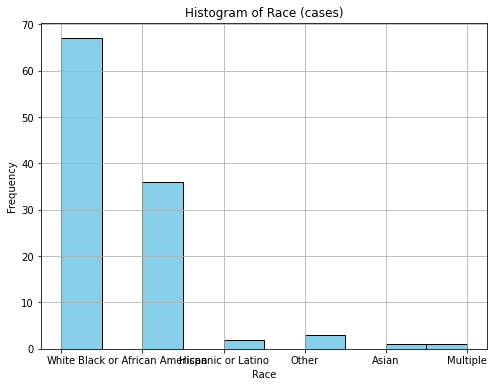

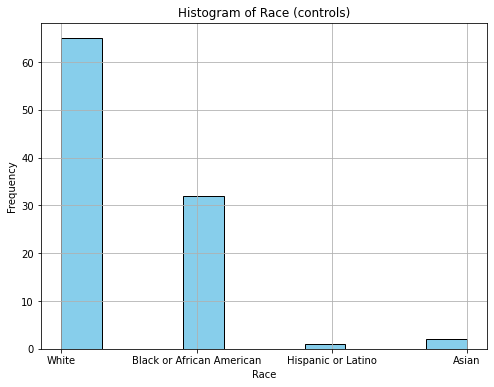

In [8]:
#
# RACE
#
# histograms
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(case["Race"], color='skyblue', edgecolor='black')
plt.xlabel("Race")
plt.ylabel('Frequency')
plt.title(f'Histogram of Race (cases)')
plt.grid(True)
plt.show()

# controls 
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(control["Race"], color='skyblue', edgecolor='black')
plt.xlabel("Race")
plt.ylabel('Frequency')
plt.title(f'Histogram of Race (controls)')
plt.grid(True)
plt.show()

## SEX

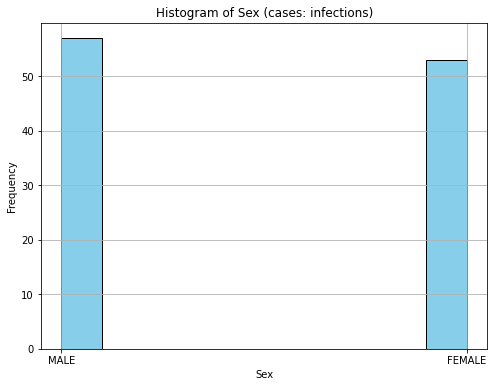

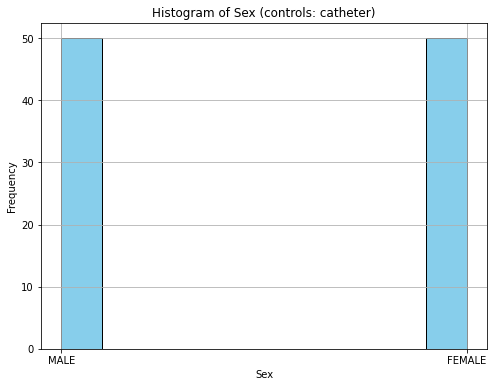

In [9]:
#
# SEX
#
# histograms
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(case["Sex"], color='skyblue', edgecolor='black')
plt.xlabel("Sex")
plt.ylabel('Frequency')
plt.title(f'Histogram of Sex (cases: infections)')
plt.grid(True)
plt.show()

# controls 
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(control["Sex"], color='skyblue', edgecolor='black')
plt.xlabel("Sex")
plt.ylabel('Frequency')
plt.title(f'Histogram of Sex (controls: catheter)')
plt.grid(True)
plt.show()

## Age

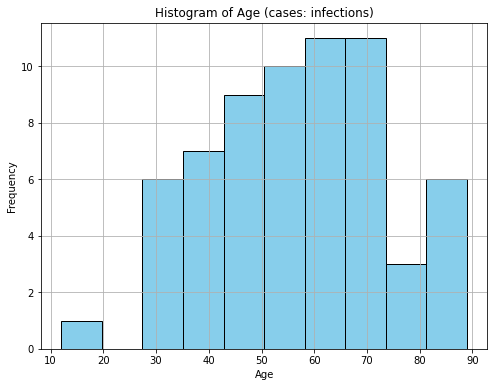

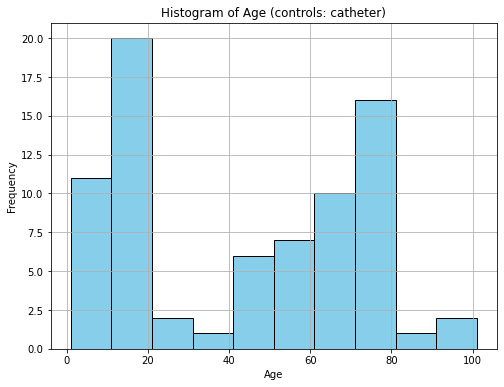

In [13]:
#
# Age
#

# remove -1 (no data)
caseWage = case[case["Age in Years"] != -1]
controlWage = control[control["Age in Years"] != -1]
                             
# histograms
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(caseWage["Age in Years"], color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title(f'Histogram of Age (cases: infections)')
plt.grid(True)
plt.show()

# controls 
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(controlWage["Age in Years"], color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title(f'Histogram of Age (controls: catheter)')
plt.grid(True)
plt.show()

cases
controls


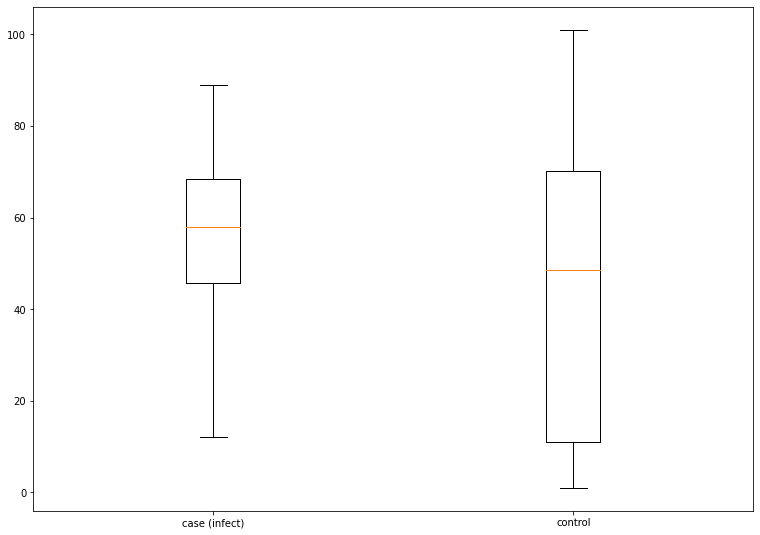

In [25]:
import scipy.stats as stats
print("cases")
caseWage["Age in Years"].agg(["count", "min", "max", "median", "mean", "skew"])
print("controls")
controlWage["Age in Years"].agg(["count", "min", "max", "median", "mean", "skew"])

boxDf = [caseWage["Age in Years"], controlWage["Age in Years"]]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(boxDf)

ax.set_xticklabels(['case (infect)', 'control'])
plt.show()

## Mann-Whitney U test for stat diff in dist

In [31]:
ageResult = stats.mannwhitneyu(list(caseWage['Age in Years']), list(controlWage['Age in Years']))
print(ageResult)
if ageResult.pvalue < 0.05: 
    print("Statistically DIFFERENT")
else: 
    print("Statistically the same")


MannwhitneyuResult(statistic=3056.5, pvalue=0.009024436377546425)
Statistically DIFFERENT
